In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'gulim'

In [2]:
df1 = pd.read_csv('data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)

In [3]:
df2.tail(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
1226410,SPB-43306,2021-02-28 23:44:24,152,마포구민체육센터 앞,0,2021-02-28 23:59:56,00427,성산시영아파트,0,15.0,2370.33


In [4]:
df = pd.concat([df1, df2])

In [5]:
df.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0


In [6]:
df.tail(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
1226410,SPB-43306,2021-02-28 23:44:24,152,마포구민체육센터 앞,0,2021-02-28 23:59:56,00427,성산시영아파트,0,15.0,2370.33


In [7]:
df.shape

(2032914, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032914 entries, 0 to 1226410
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 186.1+ MB


In [10]:
#불필요한 컬럼 삭제
df.drop(columns=['자전거번호', '대여거치대', '반납거치대'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032914 entries, 0 to 1226410
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 139.6+ MB


In [12]:
df['대여 대여소번호'] =  df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [13]:
df.dtypes

대여일시          object
대여 대여소번호    category
대여 대여소명       object
반납일시          object
반납대여소번호     category
반납대여소명        object
이용시간         float64
이용거리         float64
dtype: object

In [14]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05
...,...,...,...,...,...,...,...,...
1226406,2021-02-28 23:21:55,2910,도깨비시장,2021-02-28 23:59:48,01726,삼익세라믹아파트교차로,37.0,6403.05
1226407,2021-02-28 23:32:22,1336,성북3교 위,2021-02-28 23:59:49,00346,맥스타일 앞,27.0,3839.32
1226408,2021-02-28 22:56:01,590,건국대학교 (입학정보관),2021-02-28 23:59:54,00502,뚝섬유원지역 1번출구 앞,63.0,2021.30
1226409,2021-02-28 23:09:27,283,아크로타워 스퀘어(영등포시장),2021-02-28 23:59:56,00283,아크로타워 스퀘어(영등포시장),50.0,8361.71


In [15]:
#datetime으로 타입 변경
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

In [16]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

In [17]:
#결측치 확인 및 제거
df.isnull().sum()

대여일시         0
대여 대여소번호     0
대여 대여소명      0
반납일시         6
반납대여소번호      0
반납대여소명       0
이용시간         0
이용거리        19
dtype: int64

In [18]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
#반납대여소 번호 type 조정
df['반납대여소번호'] = df['반납대여소번호'].astype('str')
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')
df['반납대여소번호'] = df['반납대여소번호'].astype('int')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

## 대여날짜 별 자료 만들기 (대여건수, 이용시간, 이용거리)

In [20]:
# '대여 날짜' 컬럼 생성 
df['대여날짜'] = df['대여일시'].dt.date

In [21]:
df.head(1)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.0,2021-01-02


In [75]:
# 대여건수 df_count 변수 생성
df_count = df.groupby('대여날짜').대여일시.count()

In [76]:
df_count

대여날짜
2021-01-01    22119
2021-01-02    23463
2021-01-03    21656
2021-01-04    32732
2021-01-05    28819
2021-01-06    22104
2021-01-07     5471
2021-01-08     7896
2021-01-09     9017
2021-01-10    11042
2021-01-11    19366
2021-01-12    12739
2021-01-13    19652
2021-01-14    32375
2021-01-15    32218
2021-01-16    22370
2021-01-17    17951
2021-01-18    17983
2021-01-19    26706
2021-01-20    36728
2021-01-21    17329
2021-01-22    34749
2021-01-23    43127
2021-01-24    49763
2021-01-25    54324
2021-01-26    26066
2021-01-27    45370
2021-01-28    22598
2021-01-29    24228
2021-01-30    28198
2021-01-31    38344
2021-02-01    40906
2021-02-02    30919
2021-02-03    30798
2021-02-04    20063
2021-02-05    37437
2021-02-06    41251
2021-02-07    35467
2021-02-08    33993
2021-02-09    40903
2021-02-10    46378
2021-02-11    37587
2021-02-12    38041
2021-02-13    51023
2021-02-14    44465
2021-02-15    32328
2021-02-16    22881
2021-02-17    23107
2021-02-18    30048
2021-02-19    4

In [24]:
df_count.columns=['대여건수']

In [63]:
# 이용시간 df_time 변수 생성 후 Frame 형태로 반환
df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()
df_time

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
2021-01-06,463066.0
2021-01-07,105257.0
2021-01-08,154154.0
2021-01-09,204153.0


In [27]:
# 이용거리 df_distance 변수 생성 후 Frame 형태로 반환
df_distance = df.groupby('대여날짜')['이용거리'].sum().to_frame()

In [29]:
df_data = pd.concat([df_time, df_distance, df_count], axis=1)
df_data

,이용시간,이용거리,대여일시
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
2021-01-06,463066.0,5.156692e+07,22104
2021-01-07,105257.0,9.772955e+06,5471
2021-01-08,154154.0,1.422345e+07,7896
2021-01-09,204153.0,1.980417e+07,9017


## 대여/ 반납 시간별 자료 만들기

In [30]:
#대여시간, 반납시간 컬럼 추가
df['대여시간'] = df['대여일시'].dt.hour
df['반납시간'] = df['반납일시'].dt.hour

In [77]:
# 시간대별 대여 반납현황 및 시각화  
s_rental = df['대여시간'].value_counts()
s_return = df['반납시간'].value_counts()
s_rental = s_rental.sort_index()

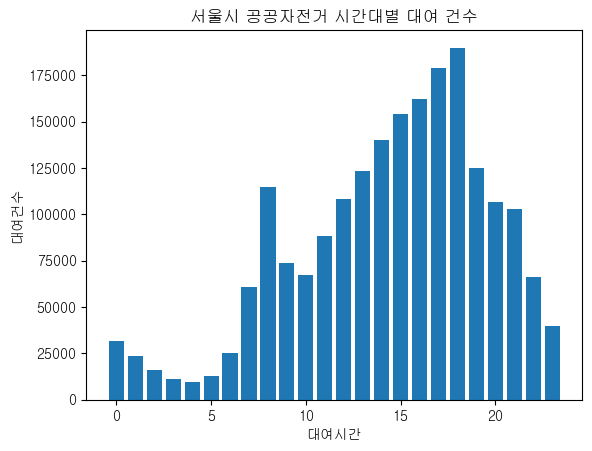

In [78]:
x = s_rental.index
y = s_rental.values
plt.bar(x, y)
plt.title('서울시 공공자전거 시간대별 대여 건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

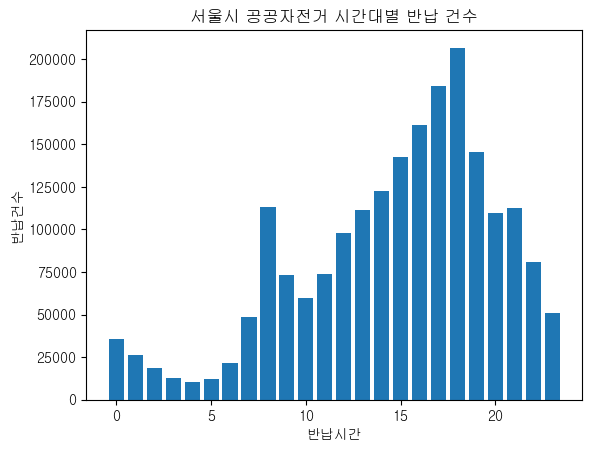

In [79]:
# 시간대별 공공자전거 반납건수 시각화
s_return = s_return.sort_index()
x = s_return.index
y = s_return.values
plt.bar(x, y)
plt.title('서울시 공공자전거 시간대별 반납 건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.show()

## 대여소별 자료 만들기 (대여건수, 반납건수 순서)

In [12]:
# 대여건수가 가장 많은 대여소
df[['대여 대여소번호', '대여 대여소명']].value_counts()[:50].to_frame()

,,0
대여 대여소번호,대여 대여소명,
502,뚝섬유원지역 1번출구 앞,9637
207,여의나루역 1번출구 앞,9485
2102,봉림교 교통섬,6146
152,마포구민체육센터 앞,5803
1210,롯데월드타워(잠실역2번출구 쪽),5472
583,청계천 생태교실 앞,5074
2715,마곡나루역 2번 출구,4982
565,옥수역 3번출구,4797
210,IFC몰,4719


In [13]:
# 반납건수가 가장 많은 대여소
df[['반납대여소번호', '반납대여소명']].value_counts()[:50].to_frame()

,,0
반납대여소번호,반납대여소명,
00502,뚝섬유원지역 1번출구 앞,8951
00207,여의나루역 1번출구 앞,7321
00152,마포구민체육센터 앞,4692
02102,봉림교 교통섬,3842
00583,청계천 생태교실 앞,3596
00565,옥수역 3번출구,3536
01210,롯데월드타워(잠실역2번출구 쪽),3412
00210,IFC몰,3376
502,뚝섬유원지역 1번출구 앞,3091


## 월드컵공원(186)  대여소 자료 분석

In [14]:
df_186 = df[df['대여 대여소번호'] == 186]
df_186.head( )

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
38173,SPB-31170,2021-01-01 07:57:38,186,월드컵공원,0,2021-01-01 08:50:11,186,월드컵공원,0,52.0,7165.94
38174,SPB-51506,2021-01-01 09:48:16,186,월드컵공원,0,2021-01-01 10:14:14,907,CJ 드림시티,0,25.0,0.00
38175,SPB-31170,2021-01-01 11:24:27,186,월드컵공원,0,2021-01-01 11:50:34,186,월드컵공원,0,26.0,3586.02
38176,SPB-33093,2021-01-01 11:26:50,186,월드컵공원,0,2021-01-01 11:50:35,186,월드컵공원,0,23.0,3629.25
38177,SPB-42577,2021-01-01 11:27:15,186,월드컵공원,0,2021-01-01 12:00:14,186,월드컵공원,0,32.0,2484.01


In [15]:
df_186.shape

(3408, 11)

### 반납 현황

In [16]:
# 반납
df_186[['반납대여소번호', '반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
00186,월드컵공원,1228
186,월드컵공원,493
00420,서울시 공공자전거 상암센터,80
00419,홈플러스 앞,49
00996,응암역 1번출구,43
...,...,...
00922,연신내역 4번출구,1
00919,서울혁신파크,1
00275,신동아아파트,1


### 이용시간 통계

In [23]:
# 이용시간 평균
df_186['이용시간'].mean()

51.2450117370892

In [24]:
# 이용시간 최대
df_186['이용시간'].max()

354.0

In [25]:
# 이용시간 최소
df_186['이용시간'].min()

2.0

In [29]:
df_186.des

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3408 entries, 38173 to 1225050
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자전거번호     3408 non-null   object 
 1   대여일시      3408 non-null   object 
 2   대여 대여소번호  3408 non-null   int64  
 3   대여 대여소명   3408 non-null   object 
 4   대여거치대     3408 non-null   object 
 5   반납일시      3408 non-null   object 
 6   반납대여소번호   3408 non-null   object 
 7   반납대여소명    3408 non-null   object 
 8   반납거치대     3408 non-null   int64  
 9   이용시간      3408 non-null   float64
 10  이용거리      3408 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 319.5+ KB


In [26]:
# 전체데이터 이용시간 평균
df['이용시간'].mean()

27.672759132949054

In [27]:
df['이용시간'].max()

6717.91

In [28]:
df['이용시간'].min()

0.0

In [ ]:
X = df.bmi.values
Y = df.index.values

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('TARGET ~ BMI')
plt.xlabel('BMI')
plt.ylabel('TARGET')
plt.show()